In [17]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import figure


In [9]:
import graph_tool.all as gt
g = gt.collection.ns["twitter_sample"]

In [14]:
#get degree list from graph
deg = g.degree_property_map("total").get_array()

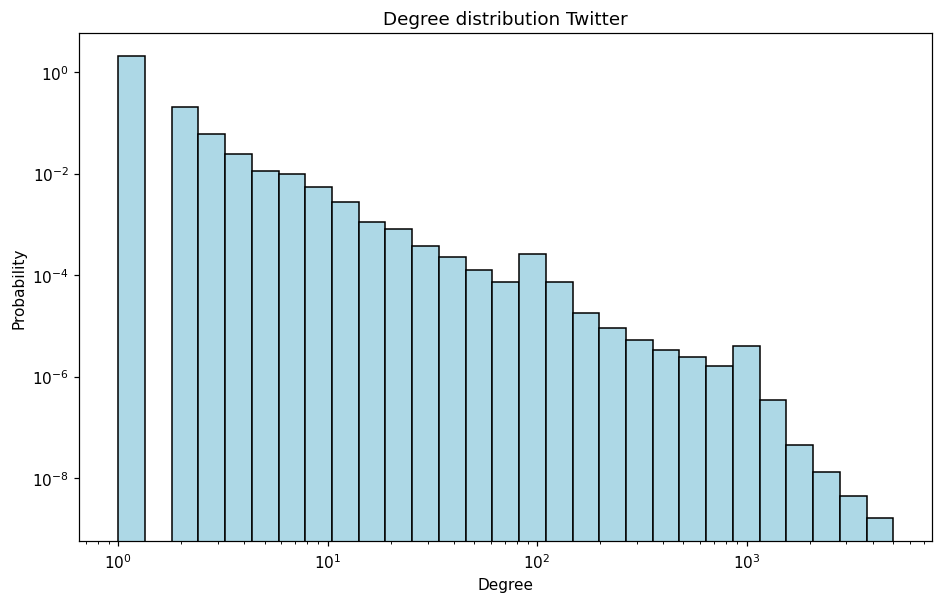

In [27]:
#increase plot size
plt.figure(figsize=(10,6), dpi=110)
my_bins = np.logspace(np.log10(min(deg)),np.log10(max(deg) +1), 30 ) 
plt.hist(deg, bins=my_bins, density = True, color = "lightblue", ec="black")
plt.title("Degree distribution Twitter")
plt.ylabel("Probability")
plt.xlabel("Degree") 
plt.xscale('log')
plt.yscale('log')
plt.show()

In [32]:
#visualize the graph g
pos = gt.sfdp_layout(g)
gt.graph_draw(g, pos=pos, output="graph-draw-sfdp.pdf")

# Backup: trying to load it to networkX

In [ ]:
!pip install zstandard

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 348.9/348.9 kB 9.5 MB/s eta 0:00:0000:01


In [ ]:
import zstandard as zstd

In [ ]:
#use the zstandard library to decompress the file dataset/network.gml.zst
with open('dataset/network.gml.zst', 'rb') as fh:
    dctx = zstd.ZstdDecompressor()
    with dctx.stream_reader(fh) as reader:
        with open('dataset/network.gml', 'wb') as out:
            out.write(reader.read())


In [ ]:
#load the network
G = nx.read_gml('dataset/network.gml')

In [ ]:
#import nodes from dataset/network.csv/nodes.csv and edges from dataset/network.csv/edges.csv
nodes = pd.read_csv('dataset/network.csv/nodes.csv')
edges = pd.read_csv('dataset/network.csv/edges.csv')

#convert the nodes and edges to a networkx graph
G = nx.from_pandas_edgelist(edges, source='# source', target=' target')

#add the nodes attributes to the graph
#nx.set_node_attributes(G, nodes.set_index('id').to_dict('index'))



In [ ]:
#edges column names
edges.columns

Index(['# source', ' target'], dtype='object')

In [ ]:
# print the number of nodes and edges
print('Number of nodes: ', G.number_of_nodes())
print('Number of edges: ', G.number_of_edges())

Number of nodes:  5384162
Number of edges:  15832003


In [ ]:
# print average degree and standard deviation
degrees = [G.degree(n) for n in G.nodes()]
print('Average degree: ', sum(degrees)/len(degrees))
print('Standard deviation: ', np.std(degrees))

Average degree:  5.8809534334219515
Standard deviation:  46.7311794026243
